# Graficos Train: 70% -> Test: 30%

In [131]:
import pandas as pd
import numpy as np

# Dataset10 - 09 - 08 - 07

In [132]:
f_d10 = pd.read_table('../SubDataSet10/result-param10-6-i2.txt',header=None)
f_d09 = pd.read_table('../SubDataSet9/result-param10-6-i2.txt',header=None)
f_d08 = pd.read_table('../SubDataSet8/result-param10-6-i2.txt',header=None)
f_d07 = pd.read_table('../SubDataSet7/result-param10-6-i2.txt',header=None)

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


In [133]:
if np.isnan(f_d10[-1:][1].values[0]):
    f_d10=f_d10[:-5]
if np.isnan(f_d09[-1:][1].values[0]):
    f_d09=f_d09[:-5]
if np.isnan(f_d08[-1:][1].values[0]):
    f_d08=f_d08[:-5]
if np.isnan(f_d07[-1:][1].values[0]):
    f_d07=f_d07[:-5]    
    

In [134]:
import matplotlib.pyplot as plt

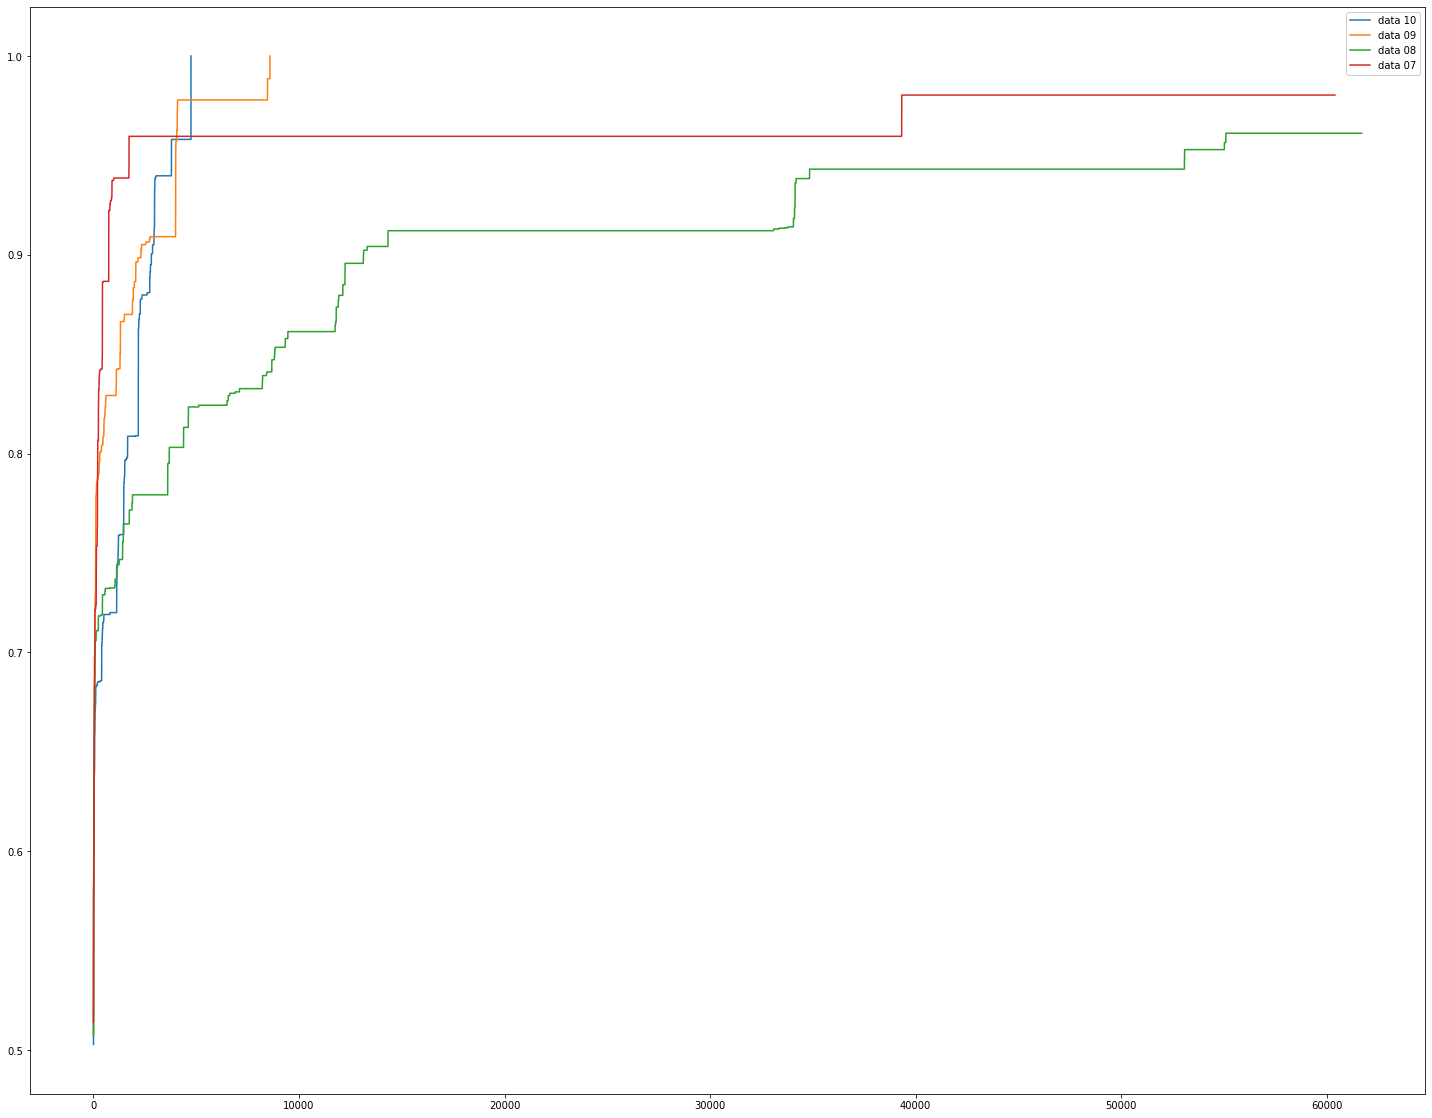

In [135]:
#plt.plot(y)
plt.plot(f_d10[1],label='data 10')
plt.plot(f_d09[1],label='data 09')
plt.plot(f_d08[1],label='data 08')
plt.plot(f_d07[1],label='data 07')
plt.legend(framealpha=1, frameon=True);

In [136]:
def df_Y2Ypredict(ruta):
    f = open(ruta)
    lines = f.readlines()
    num_epocas = int(str(lines[2][:-1]).split(' ')[-1]) #
    performance_train = float(str(lines[3]).split(' ')[-1])#
    performance_evalu = float(str(lines[4]).split(' ')[-1])#
    df_y_yPredict = pd.DataFrame([str(lines[8:-5][i]).split('\t') for i in range(len(lines[8:-5]))])
    temp = df_y_yPredict[4]
    temp = [int(temp[i]) for i in range(len(temp))]
    df_y_yPredict[4] = temp#
    accuracy = float(str(lines[-4]).split(' ')[-1])#
    df_y_yPredict = df_y_yPredict[[1,2,3,4]]
    df_y_yPredict.columns = ['v_input','v_predict','v_output','error']
    return num_epocas,performance_train, performance_evalu, df_y_yPredict, accuracy
    

In [137]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../SubDataSet10/res_test.txt')

In [138]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import seaborn as sn

In [139]:
labels = ['{0:06b}'.format(i) for i in range(1024)]

In [140]:
cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

[[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 4]]


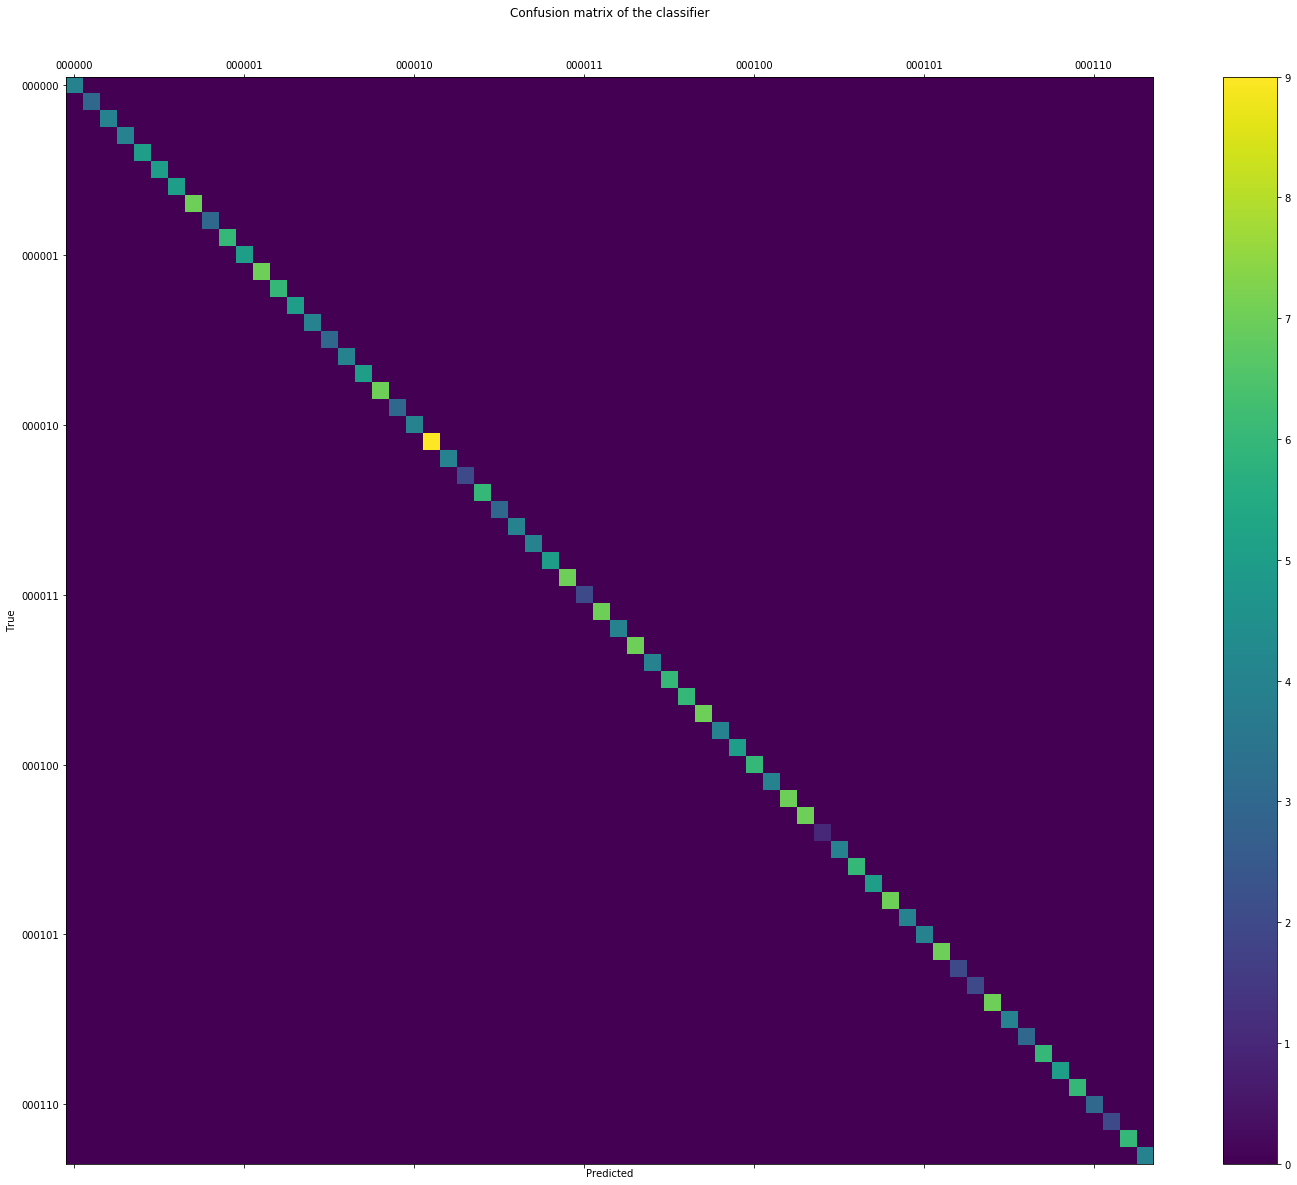

In [141]:
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size


ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

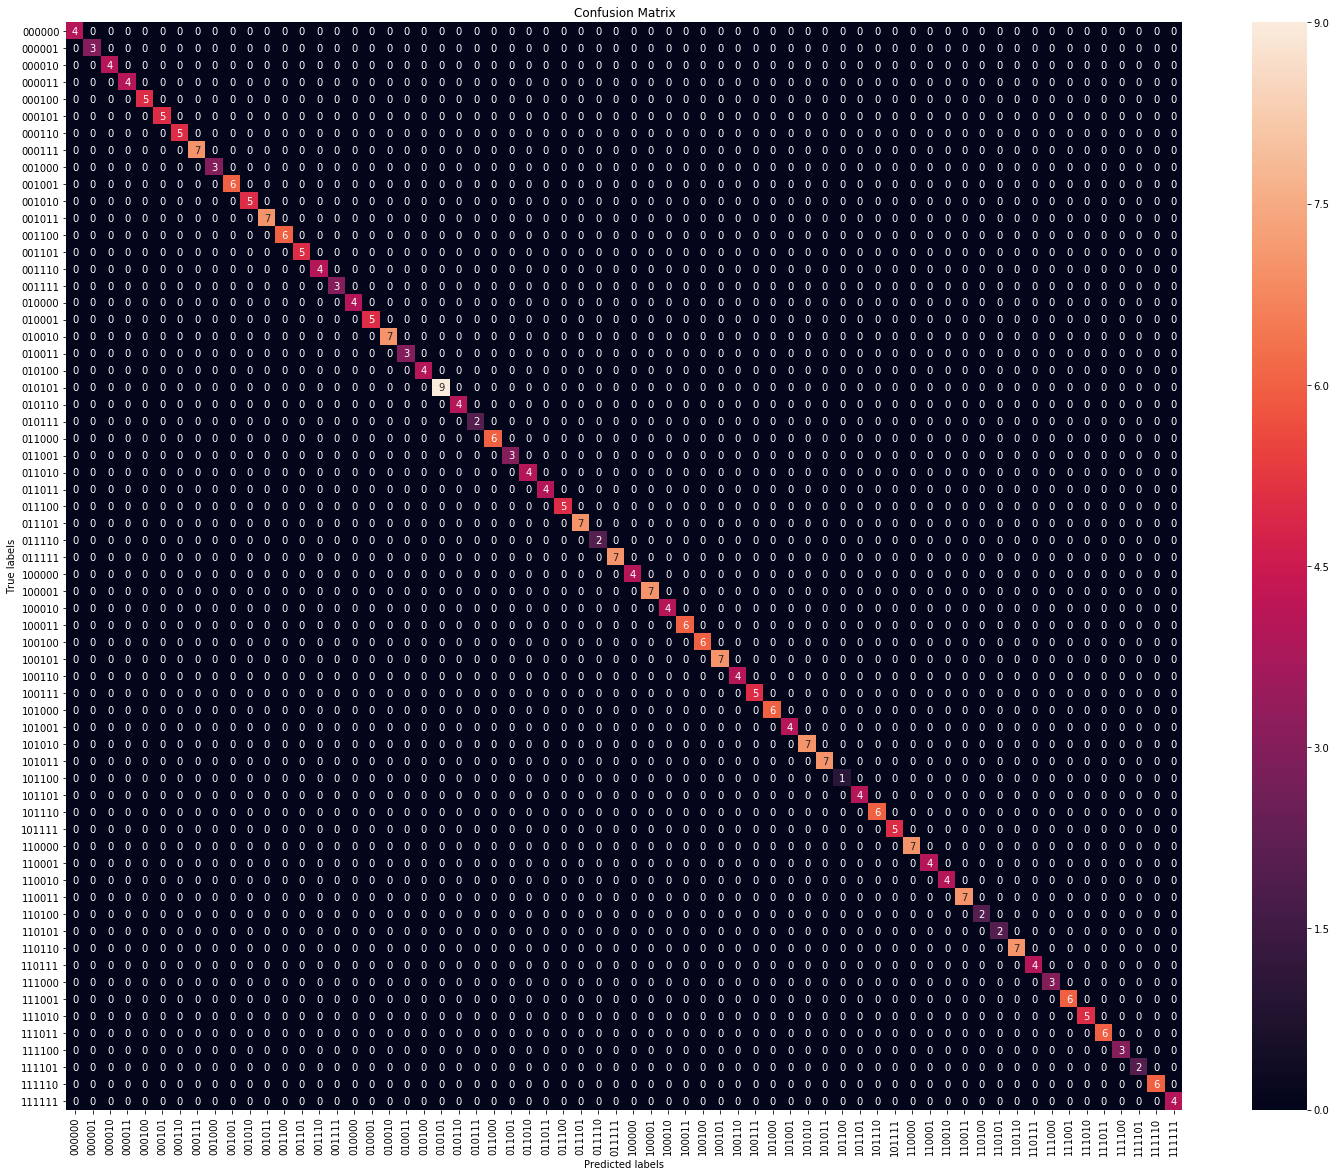

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

In [143]:

print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         4
      000001       1.00      1.00      1.00         3
      000010       1.00      1.00      1.00         4
      000011       1.00      1.00      1.00         4
      000100       1.00      1.00      1.00         5
      000101       1.00      1.00      1.00         5
      000110       1.00      1.00      1.00         5
      000111       1.00      1.00      1.00         7
      001000       1.00      1.00      1.00         3
      001001       1.00      1.00      1.00         6
      001010       1.00      1.00      1.00         5
      001011       1.00      1.00      1.00         7
      001100       1.00      1.00      1.00         6
      001101       1.00      1.00      1.00         5
      001110       1.00      1.00      1.00         4
      001111       1.00      1.00      1.00         3
      010000       1.00      1.00      1.00         4
      010001       1.00    

# Data9

In [144]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../SubDataSet9/res_test.txt')

In [145]:
labels = ['{0:06b}'.format(i) for i in range(1024)]

In [146]:
cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]


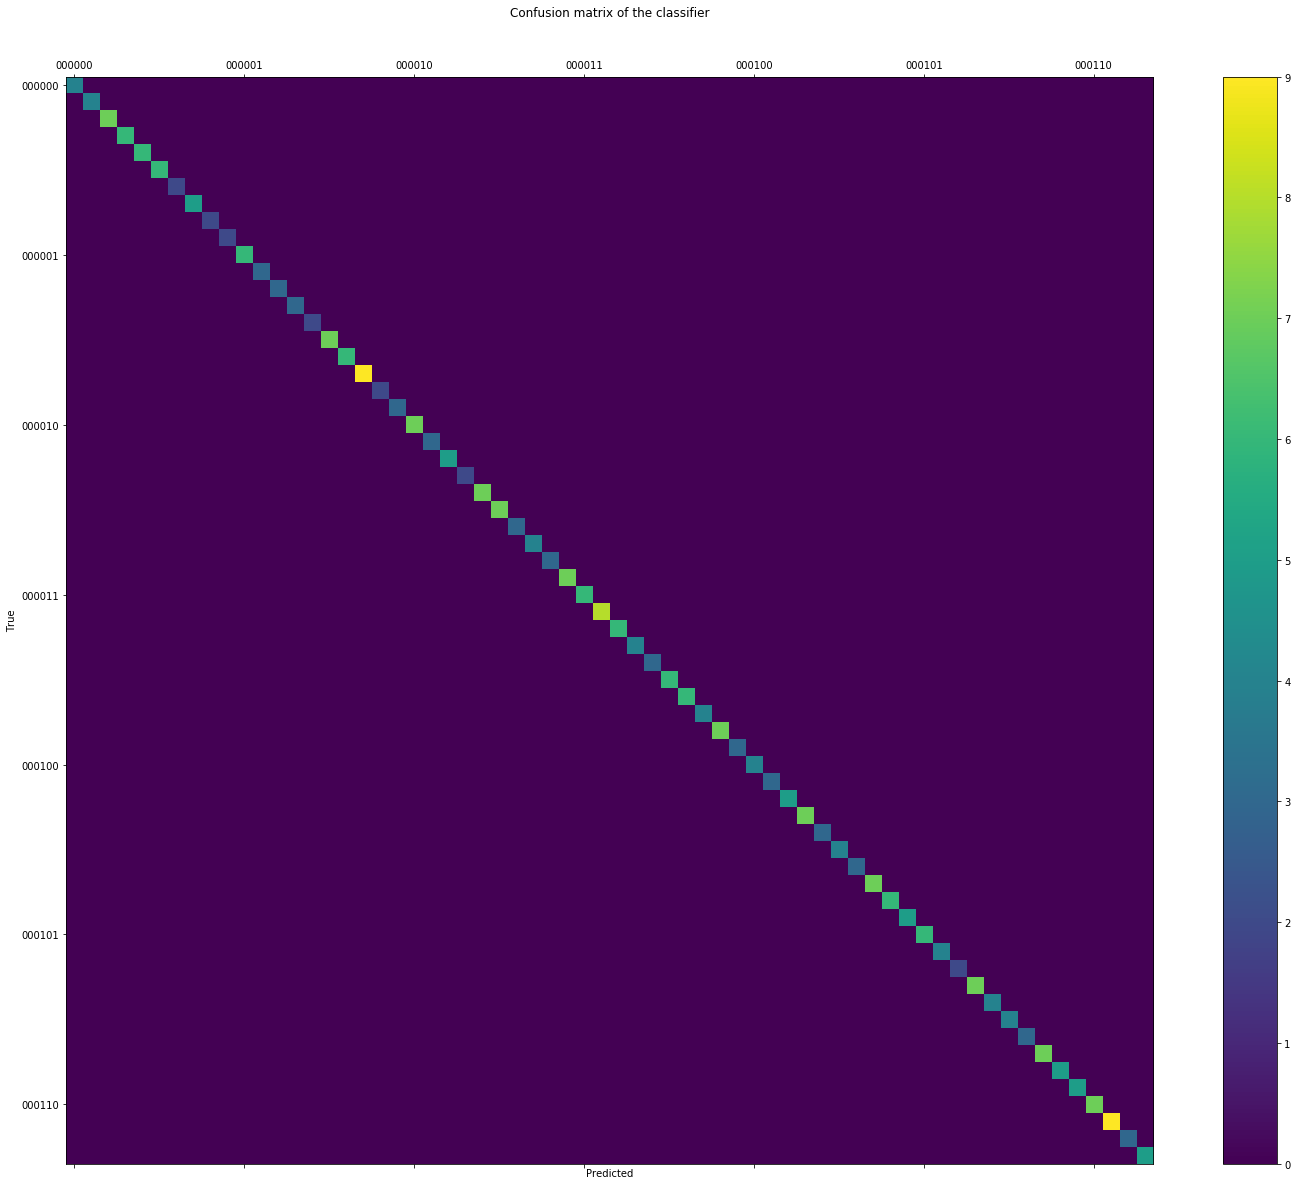

In [147]:
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size


ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

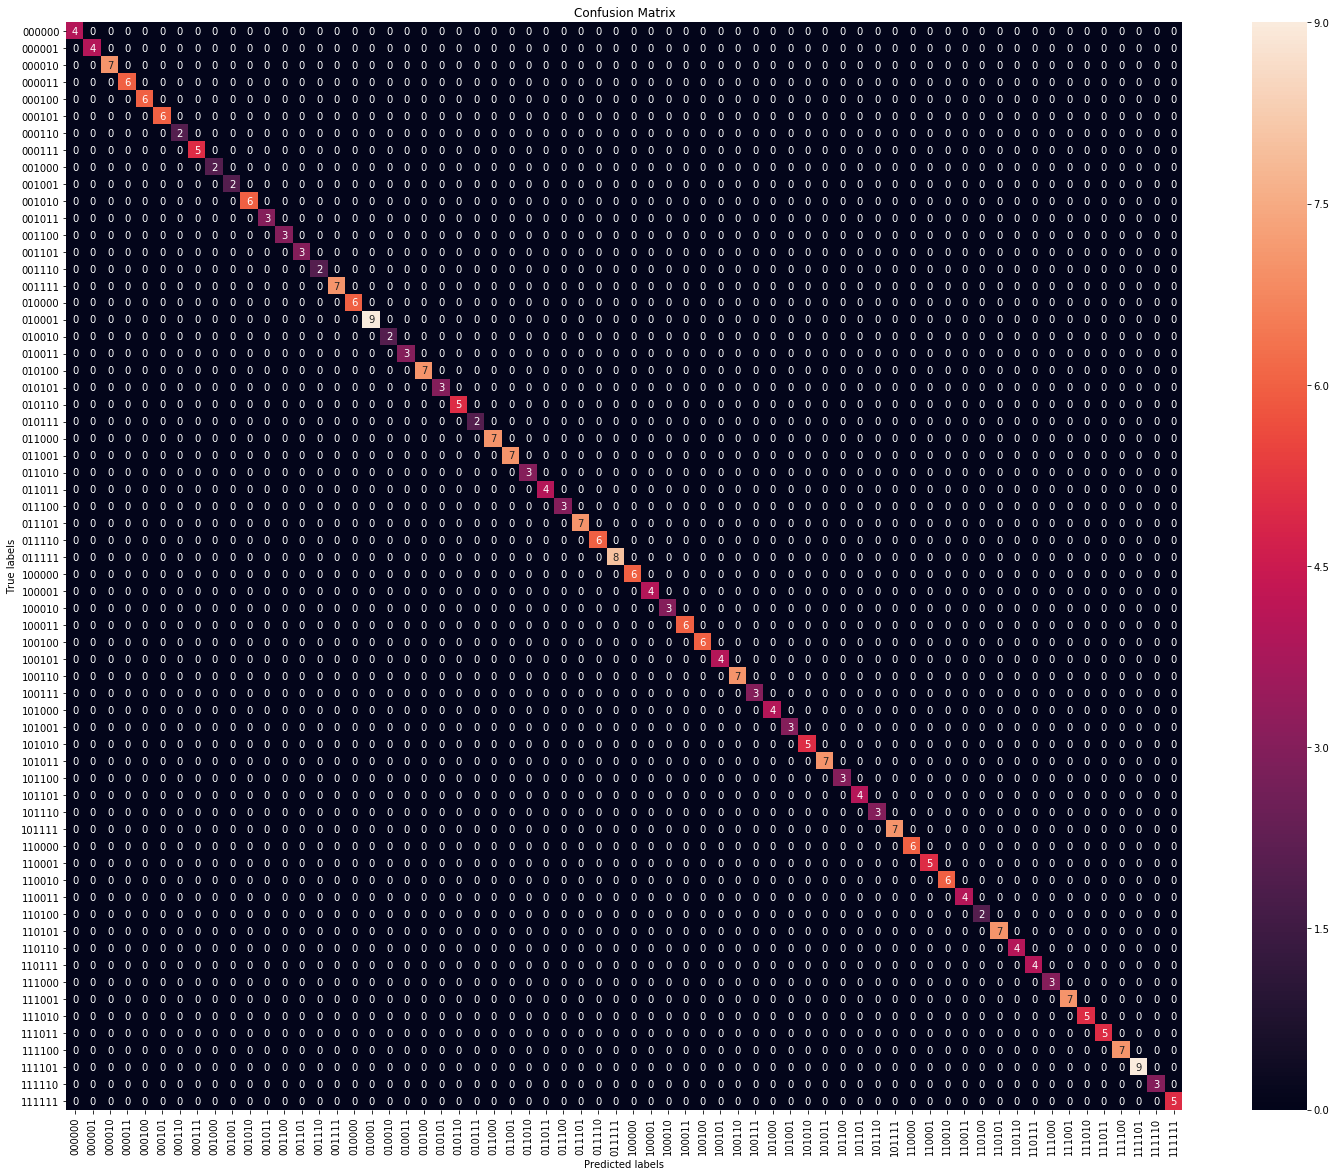

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

In [149]:
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         4
      000001       1.00      1.00      1.00         4
      000010       1.00      1.00      1.00         7
      000011       1.00      1.00      1.00         6
      000100       1.00      1.00      1.00         6
      000101       1.00      1.00      1.00         6
      000110       1.00      1.00      1.00         2
      000111       1.00      1.00      1.00         5
      001000       1.00      1.00      1.00         2
      001001       1.00      1.00      1.00         2
      001010       1.00      1.00      1.00         6
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         3
      001101       1.00      1.00      1.00         3
      001110       1.00      1.00      1.00         2
      001111       1.00      1.00      1.00         7
      010000       1.00      1.00      1.00         6
      010001       1.00    

# Data 8

[[3 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


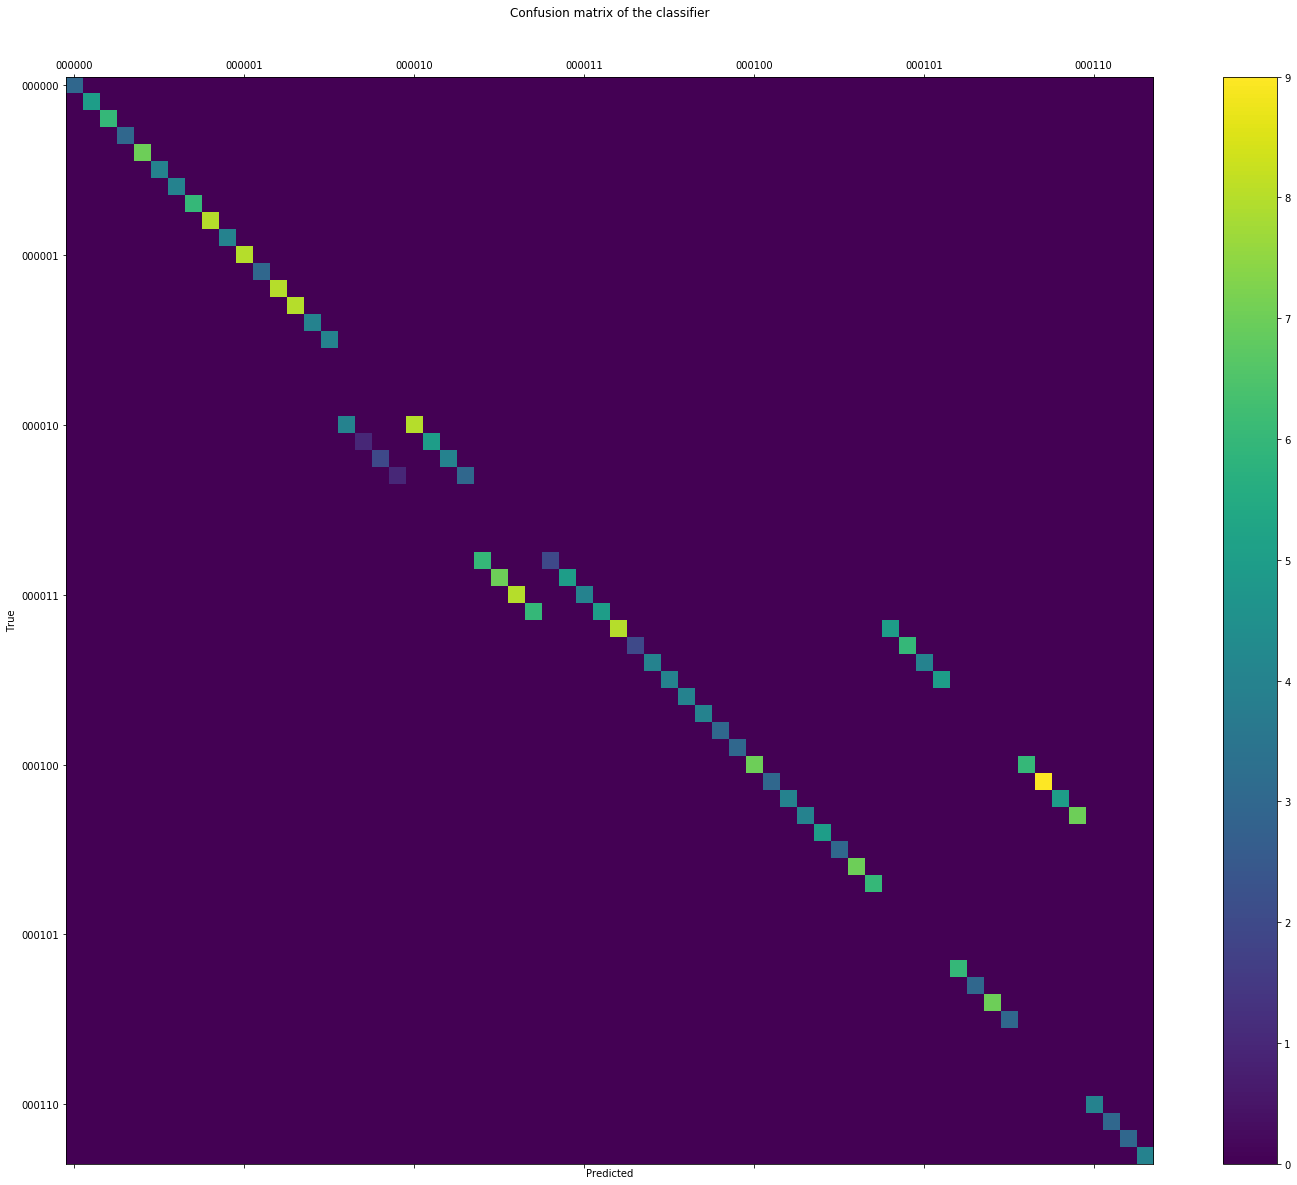

In [150]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../SubDataSet8/res_test.txt')
labels = ['{0:06b}'.format(i) for i in range(1024)]
cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size


ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

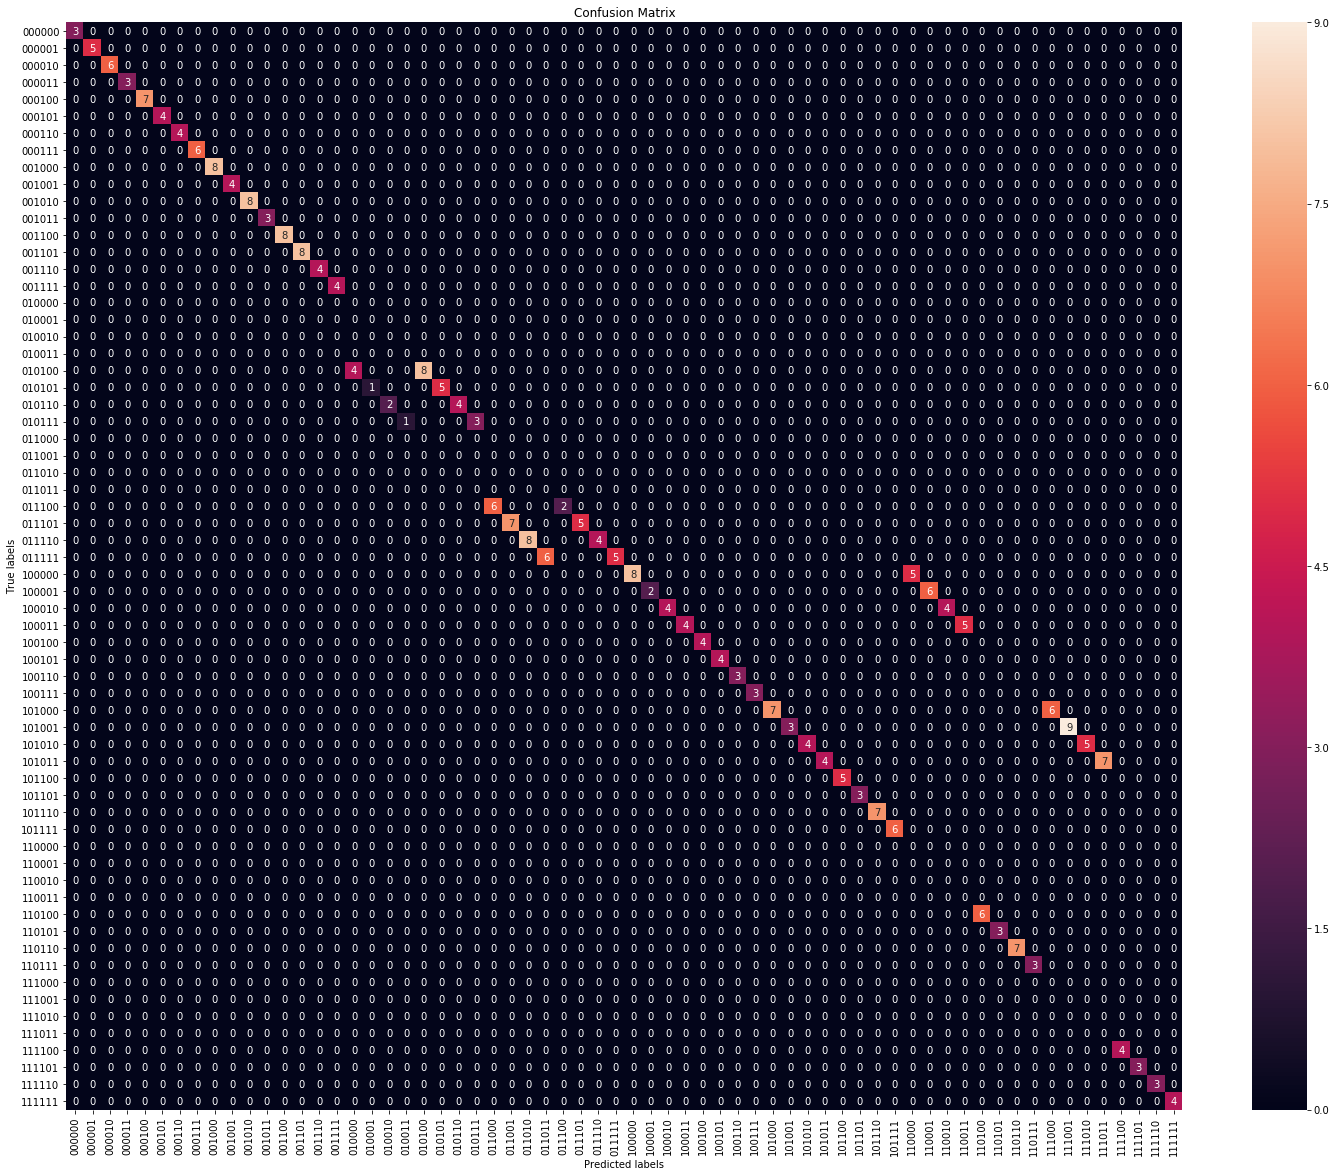

In [151]:
#import seaborn as sns
#import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

In [152]:
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         3
      000001       1.00      1.00      1.00         5
      000010       1.00      1.00      1.00         6
      000011       1.00      1.00      1.00         3
      000100       1.00      1.00      1.00         7
      000101       1.00      1.00      1.00         4
      000110       1.00      1.00      1.00         4
      000111       1.00      1.00      1.00         6
      001000       1.00      1.00      1.00         8
      001001       1.00      1.00      1.00         4
      001010       1.00      1.00      1.00         8
      001011       1.00      1.00      1.00         3
      001100       1.00      1.00      1.00         8
      001101       1.00      1.00      1.00         8
      001110       1.00      1.00      1.00         4
      001111       1.00      1.00      1.00         4
      010000       0.00      0.00      0.00         0
      010001       0.00    

C:\Users\Miguel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Data 7

0.869707
[[4 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 5]]


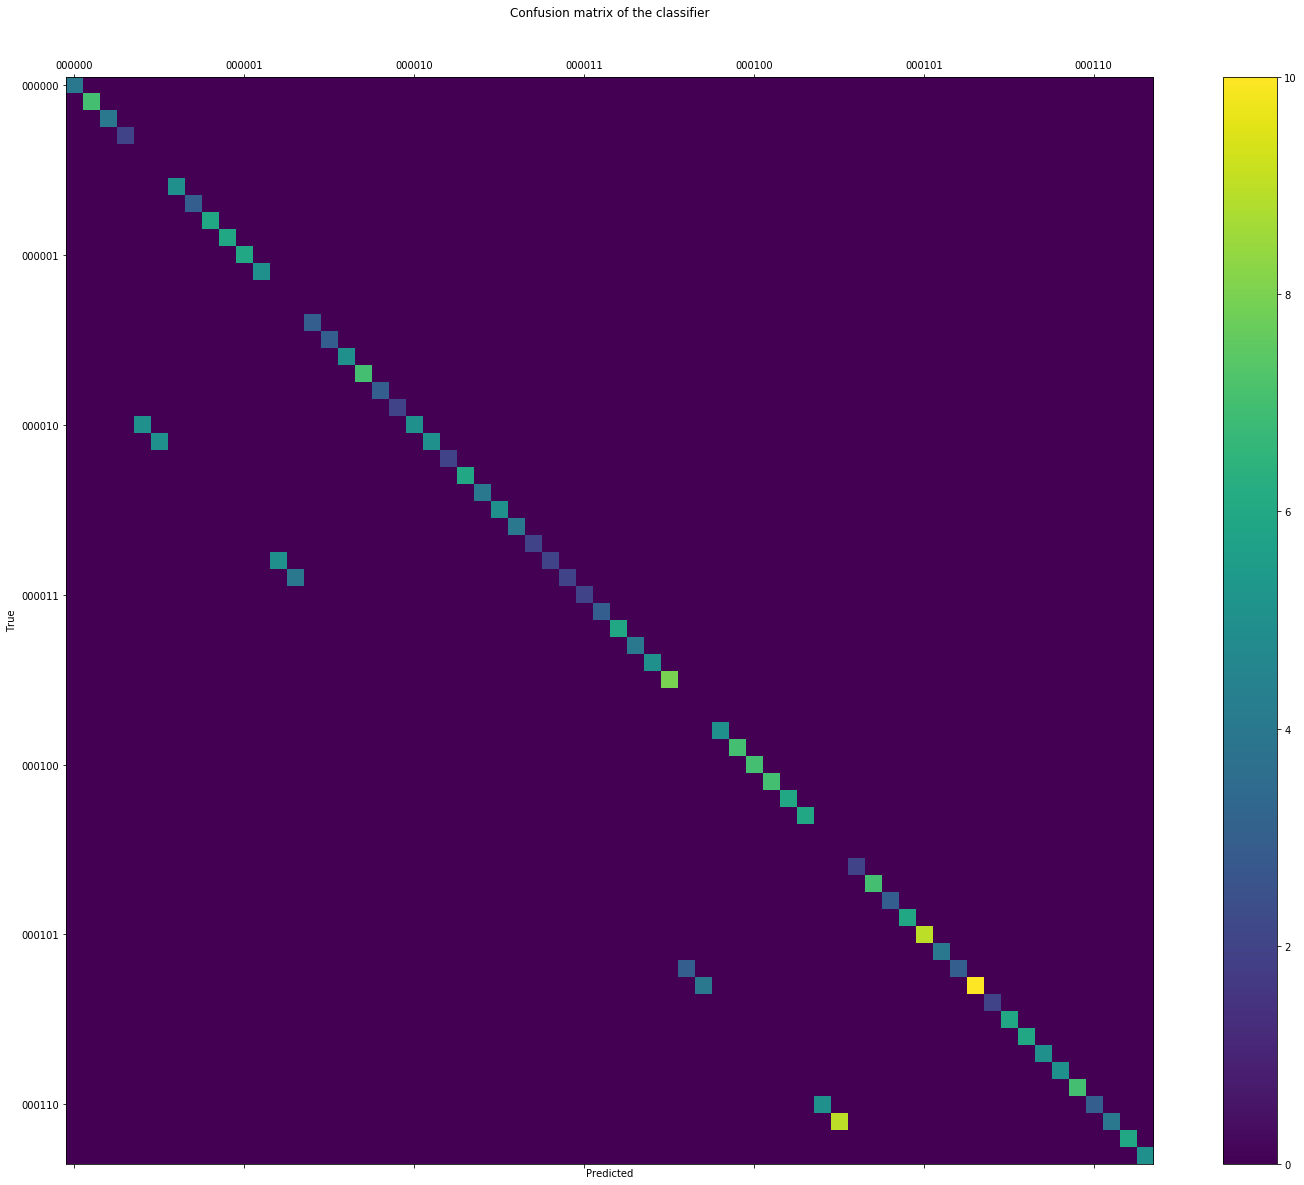

In [153]:
epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../SubDataSet7/res_test.txt')
labels = ['{0:06b}'.format(i) for i in range(1024)]
cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print(ac)

print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size


ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

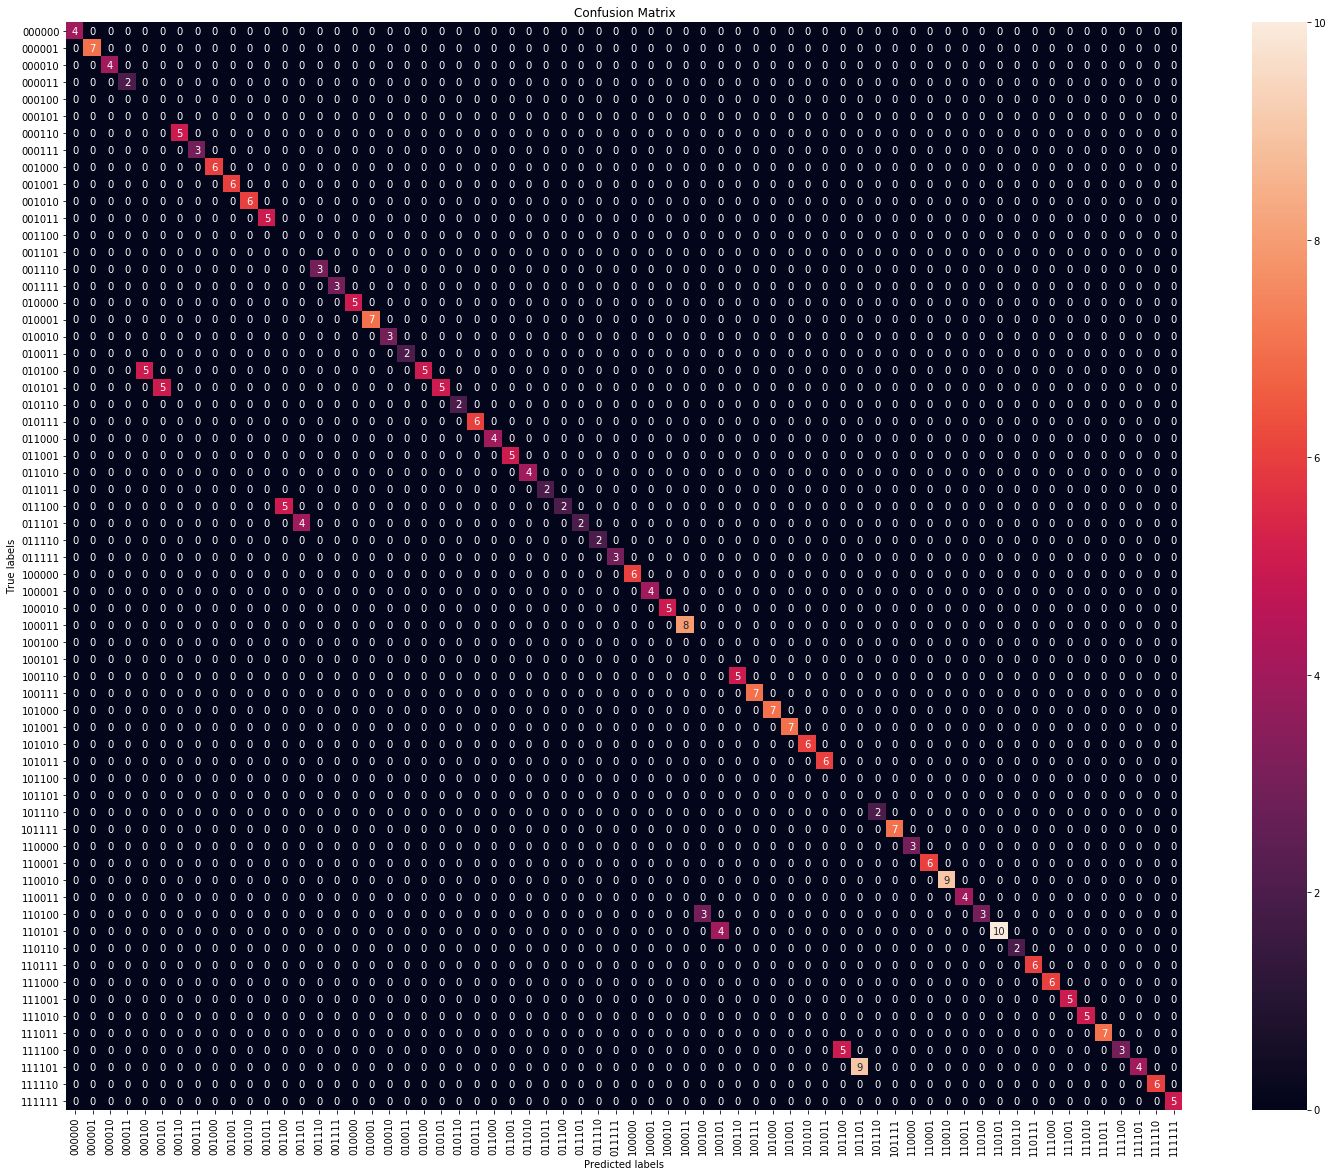

In [154]:
#import seaborn as sns
#import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

In [155]:
print(classification_report(df_TP['v_output'], df_TP['v_predict']))

              precision    recall  f1-score   support

      000000       1.00      1.00      1.00         4
      000001       1.00      1.00      1.00         7
      000010       1.00      1.00      1.00         4
      000011       1.00      1.00      1.00         2
      000100       0.00      0.00      0.00         0
      000101       0.00      0.00      0.00         0
      000110       1.00      1.00      1.00         5
      000111       1.00      1.00      1.00         3
      001000       1.00      1.00      1.00         6
      001001       1.00      1.00      1.00         6
      001010       1.00      1.00      1.00         6
      001011       1.00      1.00      1.00         5
      001100       0.00      0.00      0.00         0
      001101       0.00      0.00      0.00         0
      001110       1.00      1.00      1.00         3
      001111       1.00      1.00      1.00         3
      010000       1.00      1.00      1.00         5
      010001       1.00    

____

# Graficos Train: 30% -> Test: 70%

## Data 7

In [156]:
f_d07_30 = pd.read_table('../SubDataSet7-test-train/result-param10-6-i2.txt',header=None)

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [157]:
if np.isnan(f_d07_30[-1:][1].values[0]):
    f_d07_30=f_d07_30[:-5]

In [158]:
epocas_0, pTrain_0, pHamm_0, df_TP_0, ac_0 = df_Y2Ypredict('../SubDataSet7-test-train/res_test.txt')
epocas_1, pTrain_1, pHamm_1, df_TP_1, ac_1 = df_Y2Ypredict('../SubDataSet7-test-train-v02-75/res_test.txt')
epocas_2, pTrain_2, pHamm_2, df_TP_2, ac_2 = df_Y2Ypredict('../SubDataSet7-test-train-v03-76/res_test.txt')
epocas_3, pTrain_3, pHamm_3, df_TP_3, ac_3 = df_Y2Ypredict('../SubDataSet7-test-train-v04-80/res_test.txt')
epocas_4, pTrain_4, pHamm_4, df_TP_4, ac_4 = df_Y2Ypredict('../SubDataSet7-test-train-v05-81/res_test.txt')
epocas_5, pTrain_5, pHamm_5, df_TP_5, ac_5 = df_Y2Ypredict('../SubDataSet7-test-train-v06-83/res_test.txt')
epocas_6, pTrain_6, pHamm_6, df_TP_6, ac_6 = df_Y2Ypredict('../SubDataSet7-test-train-v07-85/res_test.txt')
epocas_7, pTrain_7, pHamm_7, df_TP_7, ac_7 = df_Y2Ypredict('../SubDataSet7-test-train-v08-86/res_test.txt')
epocas_8, pTrain_8, pHamm_8, df_TP_8, ac_8 = df_Y2Ypredict('../SubDataSet7-test-train-v09-87/res_test.txt')
epocas_9, pTrain_9, pHamm_9, df_TP_9, ac_9 = df_Y2Ypredict('../SubDataSet7-test-train-v10-88/res_test.txt')
epocas_10, pTrain_10, pHamm_10, df_TP_10, ac_10 = df_Y2Ypredict('../SubDataSet7-test-train-v11-91/res_test.txt')
epocas_11, pTrain_11, pHamm_11, df_TP_11, ac_11 = df_Y2Ypredict('../SubDataSet7-test-train-v12-92/res_test.txt')
epocas_12, pTrain_12, pHamm_12, df_TP_12, ac_12 = df_Y2Ypredict('../SubDataSet7-test-train-v13-95/res_test.txt')
epocas_13, pTrain_13, pHamm_13, df_TP_13, ac_13 = df_Y2Ypredict('../SubDataSet7-test-train-v14-95-epoca-56760/res_test.txt')

In [159]:
p_test_epoca = [epocas_0,epocas_1,epocas_2,epocas_3,epocas_4,epocas_5,epocas_6,epocas_7,epocas_8,epocas_9,epocas_10,epocas_11,epocas_12,epocas_13]
p_test_ac = [ac_0,ac_1,ac_2,ac_3,ac_4,ac_5,ac_6,ac_7,ac_8,ac_9,ac_10,ac_11,ac_12,ac_13]

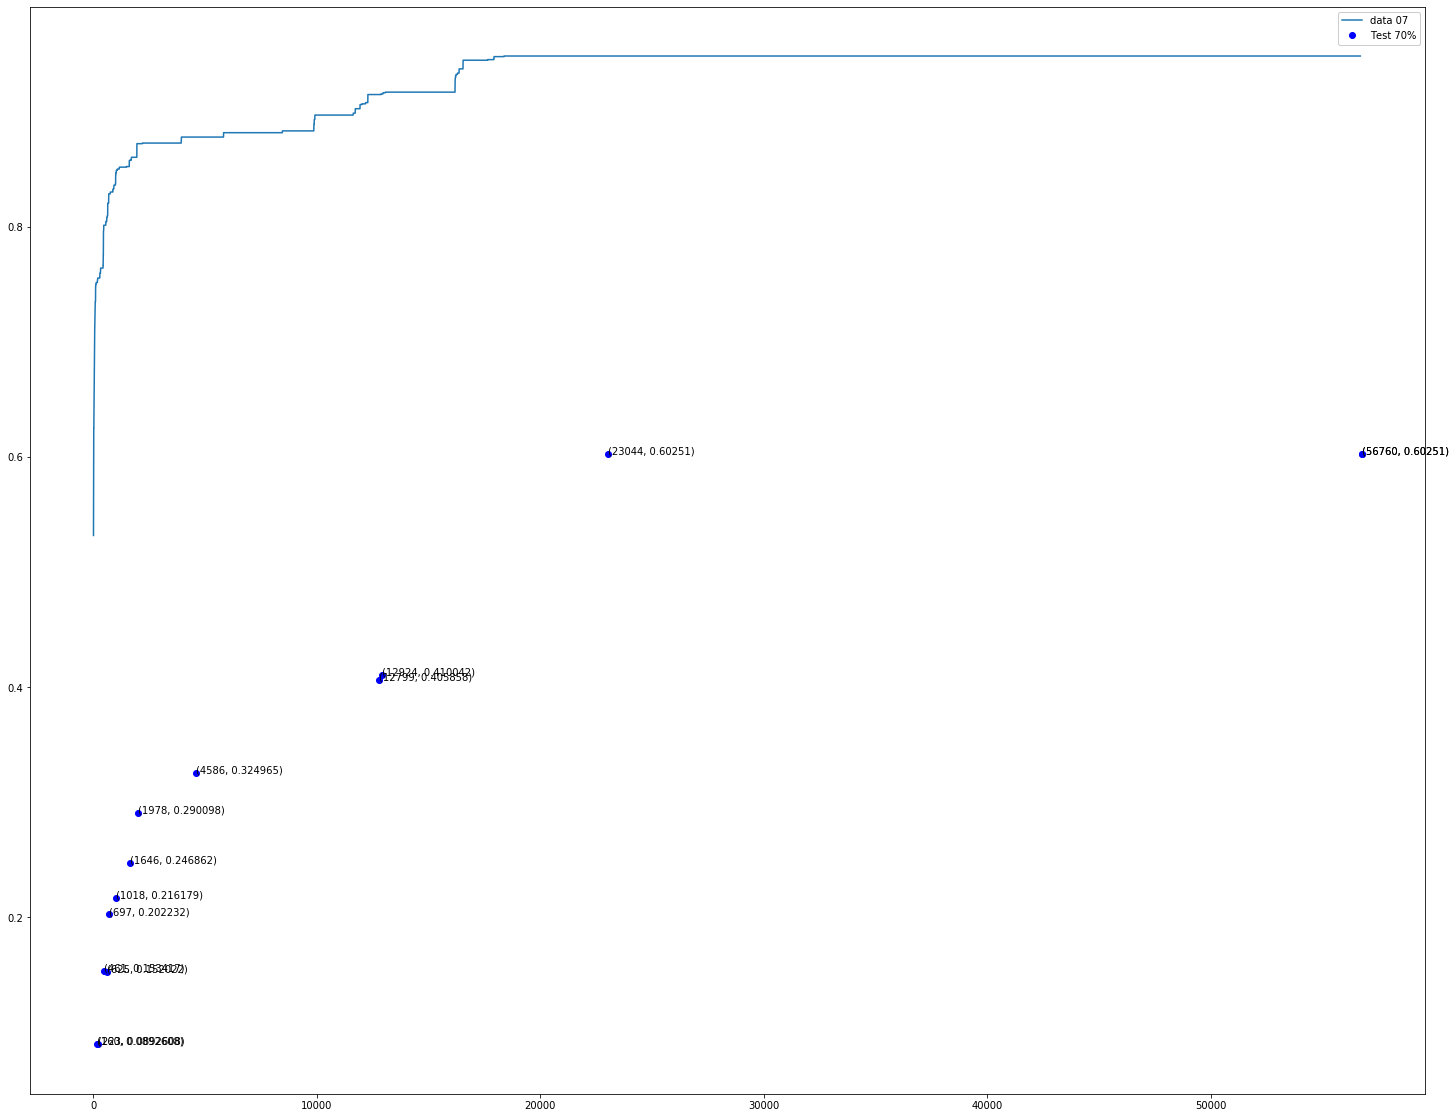

In [160]:
plt.plot(f_d07_30[1],label='data 07')
plt.plot(p_test_epoca,p_test_ac,'bo',label='Test 70%')
for i_x, i_y in zip(p_test_epoca, p_test_ac):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.legend(framealpha=1, frameon=True);

0.869707
[[ 0  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [12  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 10 11]]


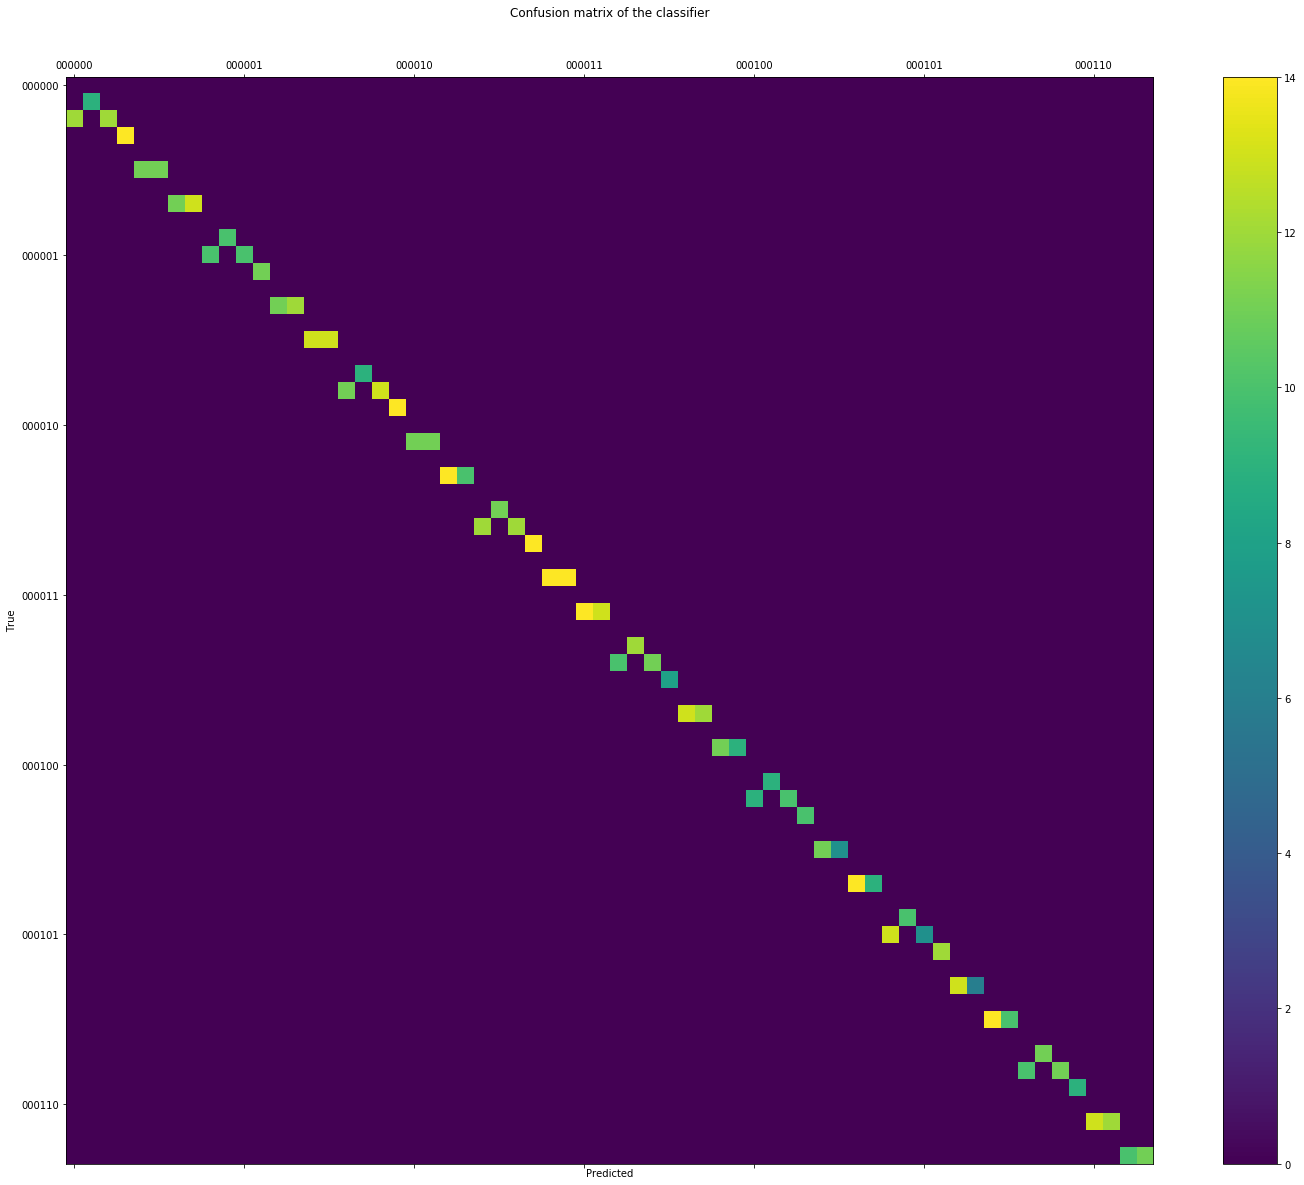

In [161]:
#epocas, pTrain, pHamm, df_TP, ac = df_Y2Ypredict('../SubDataSet7/res_test.txt')
labels = ['{0:06b}'.format(i) for i in range(1024)]
cm = confusion_matrix(df_TP_0['v_output'], df_TP_0['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print(ac)

print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size


ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

epoca: 56760 	pTrain: 0.948404 	pHamm 0.936402 	pTest: 0.60251
[[ 0  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [12  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 10 11]]


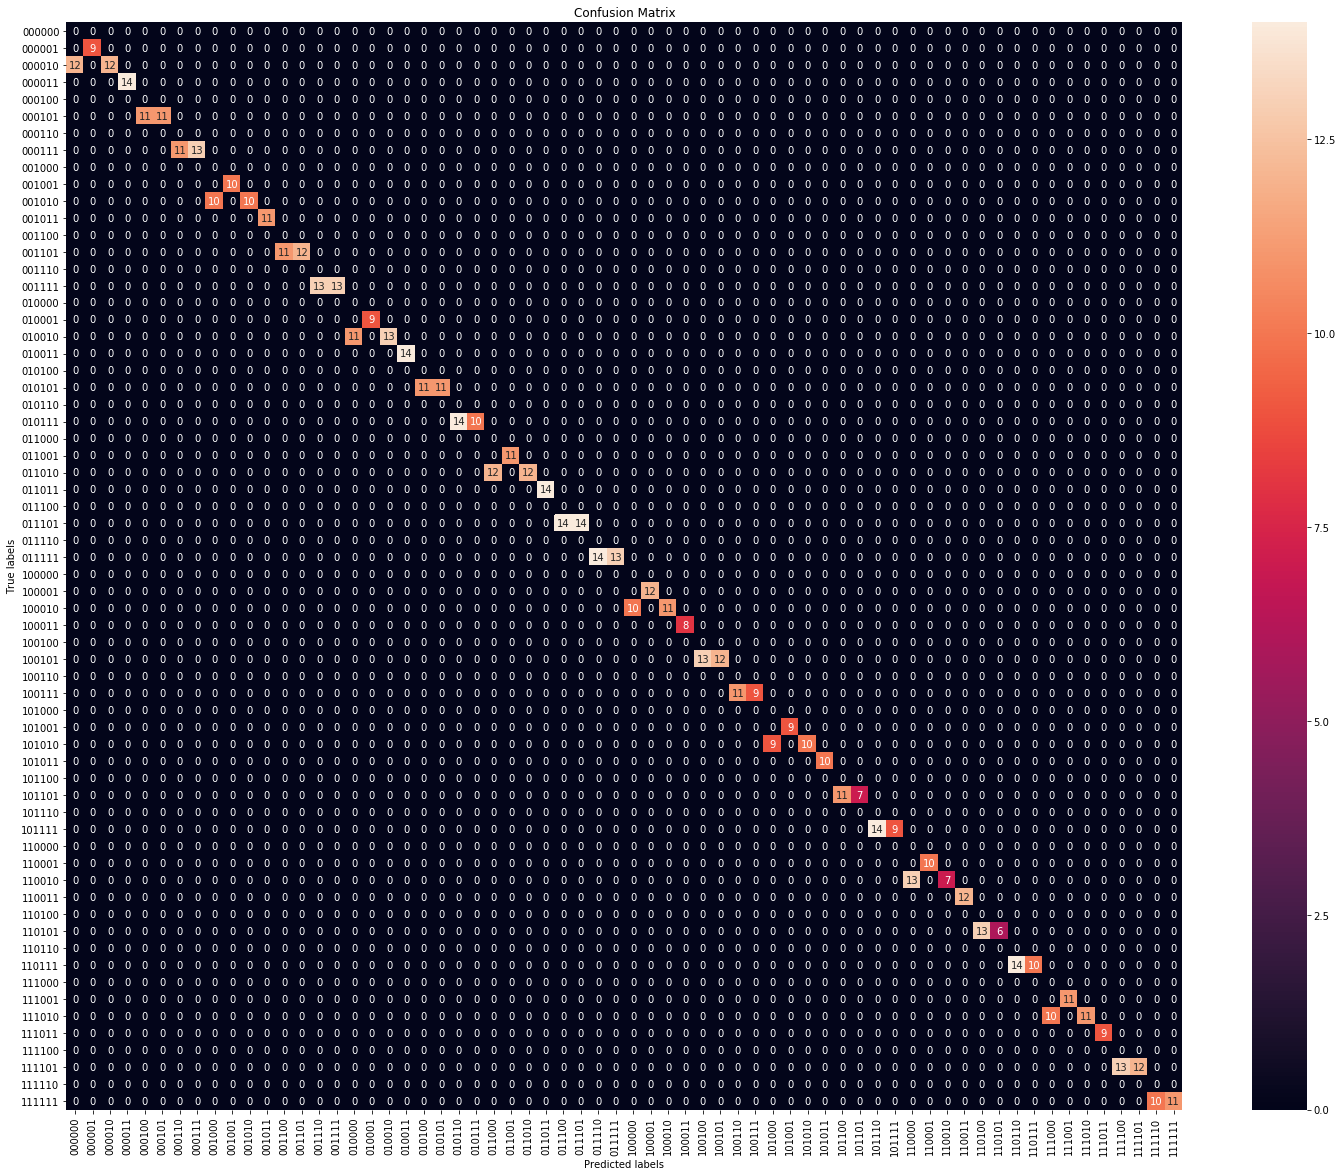

In [162]:
#import seaborn as sns
#import matplotlib.pyplot as plt     

cm = confusion_matrix(df_TP_0['v_output'], df_TP_0['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print("epoca:",epocas_0,"\tpTrain:", pTrain_0,"\tpHamm", pHamm_0,"\tpTest:",ac_0)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

# Data 8

In [163]:
f_d08_30 = pd.read_table('../SubDataSet8-test-train/result-param10-6-i2.txt',header=None)

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [164]:
if np.isnan(f_d07_30[-1:][1].values[0]):
    f_d07_30=f_d07_30[:-5]

In [165]:
epocas_0, pTrain_0, pHamm_0, df_TP_0, ac_0 = df_Y2Ypredict('../SubDataSet8-test-train/res_test.txt')
epocas_1, pTrain_1, pHamm_1, df_TP_1, ac_1 = df_Y2Ypredict('../SubDataSet8-test-train-v02-80-epoca-2100/res_test.txt')
epocas_2, pTrain_2, pHamm_2, df_TP_2, ac_2 = df_Y2Ypredict('../SubDataSet8-test-train-v03-82-epoca-4200/res_test.txt')
epocas_3, pTrain_3, pHamm_3, df_TP_3, ac_3 = df_Y2Ypredict('../SubDataSet8-test-train-v04-83-epoca-4300/res_test.txt')
epocas_4, pTrain_4, pHamm_4, df_TP_4, ac_4 = df_Y2Ypredict('../SubDataSet8-test-train-v05-85/res_test.txt')
epocas_5, pTrain_5, pHamm_5, df_TP_5, ac_5 = df_Y2Ypredict('../SubDataSet8-test-train-v06-86/res_test.txt')
epocas_6, pTrain_6, pHamm_6, df_TP_6, ac_6 = df_Y2Ypredict('../SubDataSet8-test-train-v07-87/res_test.txt')
epocas_7, pTrain_7, pHamm_7, df_TP_7, ac_7 = df_Y2Ypredict('../SubDataSet8-test-train-v08-89-epoca-6700/res_test.txt')
epocas_8, pTrain_8, pHamm_8, df_TP_8, ac_8 = df_Y2Ypredict('../SubDataSet8-test-train-v09-91-epoca-17500/res_test.txt')
epocas_9, pTrain_9, pHamm_9, df_TP_9, ac_9 = df_Y2Ypredict('../SubDataSet8-test-train-v10-92-epoca-18800/res_test.txt')
epocas_10, pTrain_10, pHamm_10, df_TP_10, ac_10 = df_Y2Ypredict('../SubDataSet8-test-train-v11-93-epoca-20000/res_test.txt')
epocas_11, pTrain_11, pHamm_11, df_TP_11, ac_11 = df_Y2Ypredict('../SubDataSet8-test-train-v12-98/res_test.txt')


In [166]:
p_test_epoca = [epocas_0,epocas_1,epocas_2,epocas_3,epocas_4,epocas_5,epocas_6,epocas_7,epocas_8,epocas_9,epocas_10,epocas_11]
p_test_ac = [ac_0,ac_1,ac_2,ac_3,ac_4,ac_5,ac_6,ac_7,ac_8,ac_9,ac_10,ac_11]

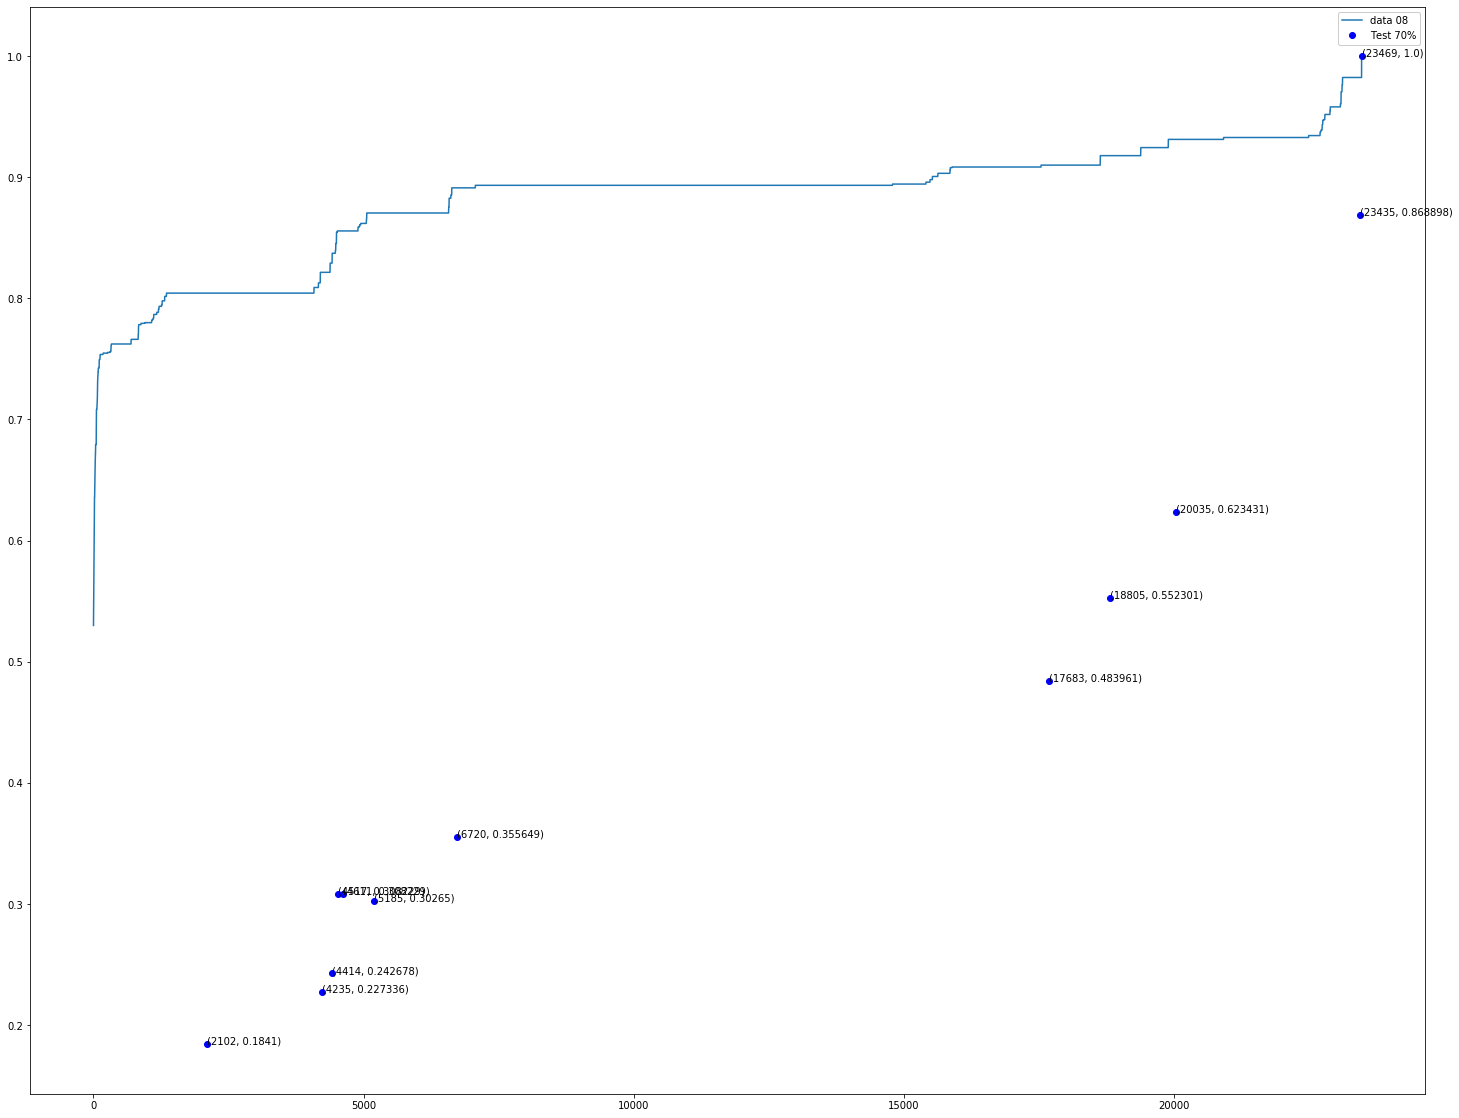

In [167]:
plt.plot(f_d08_30[1],label='data 08')
plt.plot(p_test_epoca,p_test_ac,'bo',label='Test 70%')
for i_x, i_y in zip(p_test_epoca, p_test_ac):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.legend(framealpha=1, frameon=True);

epoca: 23469 	pTrain: 1.0 	pHamm 1.0 	pTest: 1.0
[[13  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 12]]


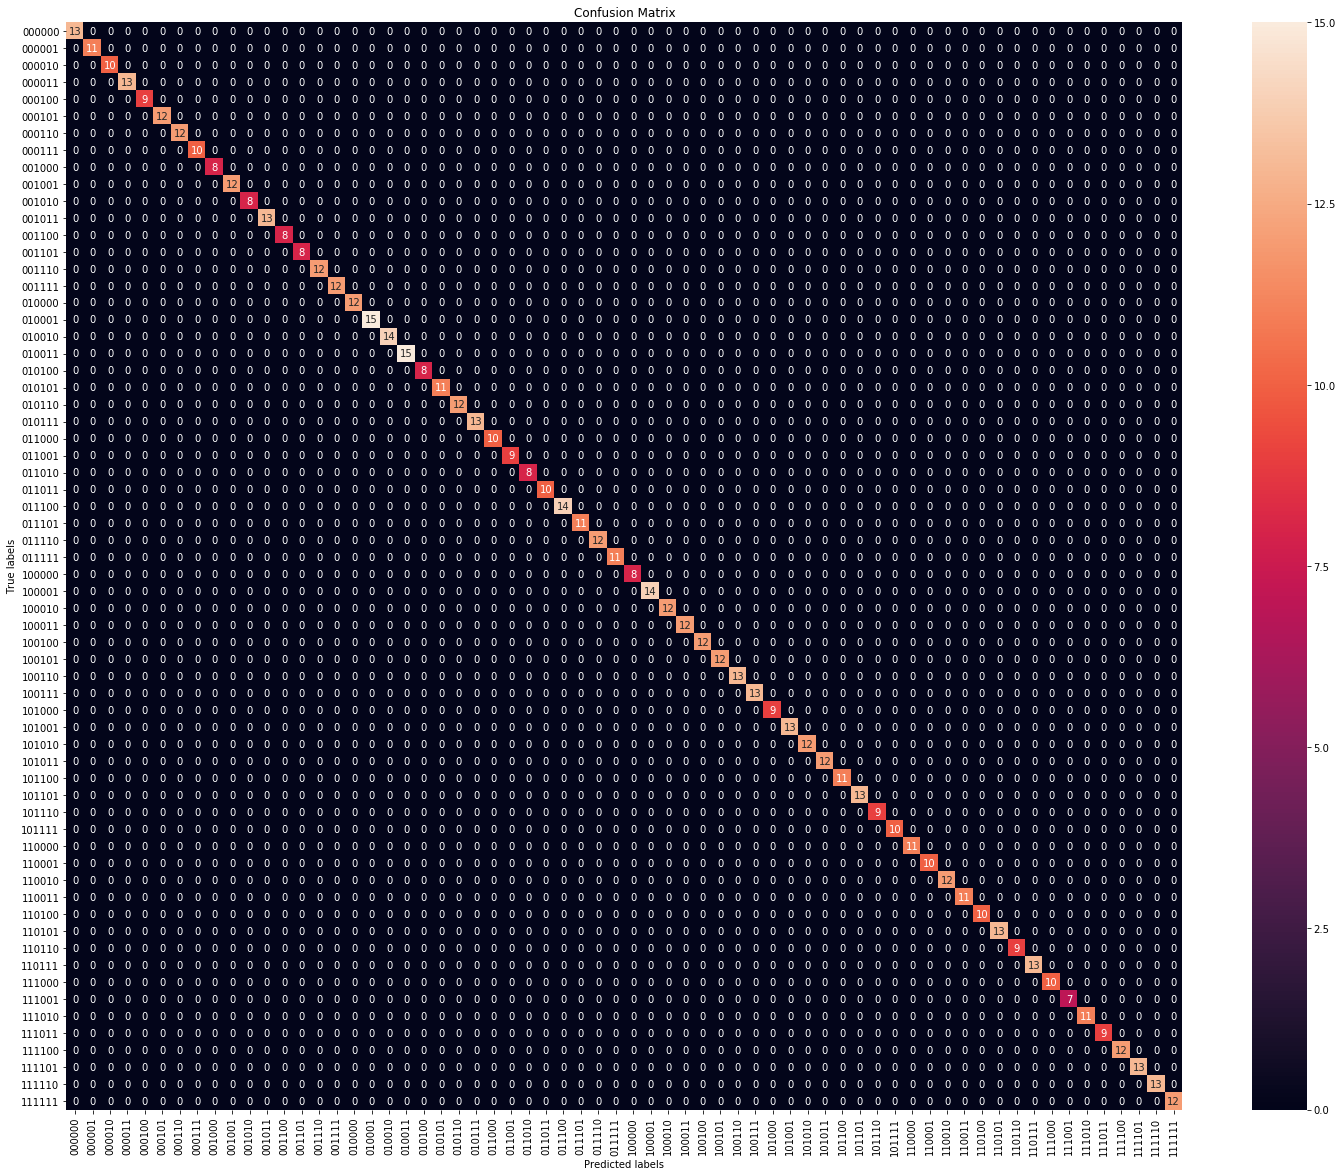

In [168]:
#import seaborn as sns
#import matplotlib.pyplot as plt     

cm = confusion_matrix(df_TP_0['v_output'], df_TP_0['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print("epoca:",epocas_0,"\tpTrain:", pTrain_0,"\tpHamm", pHamm_0,"\tpTest:",ac_0)

print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

# Data 9

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


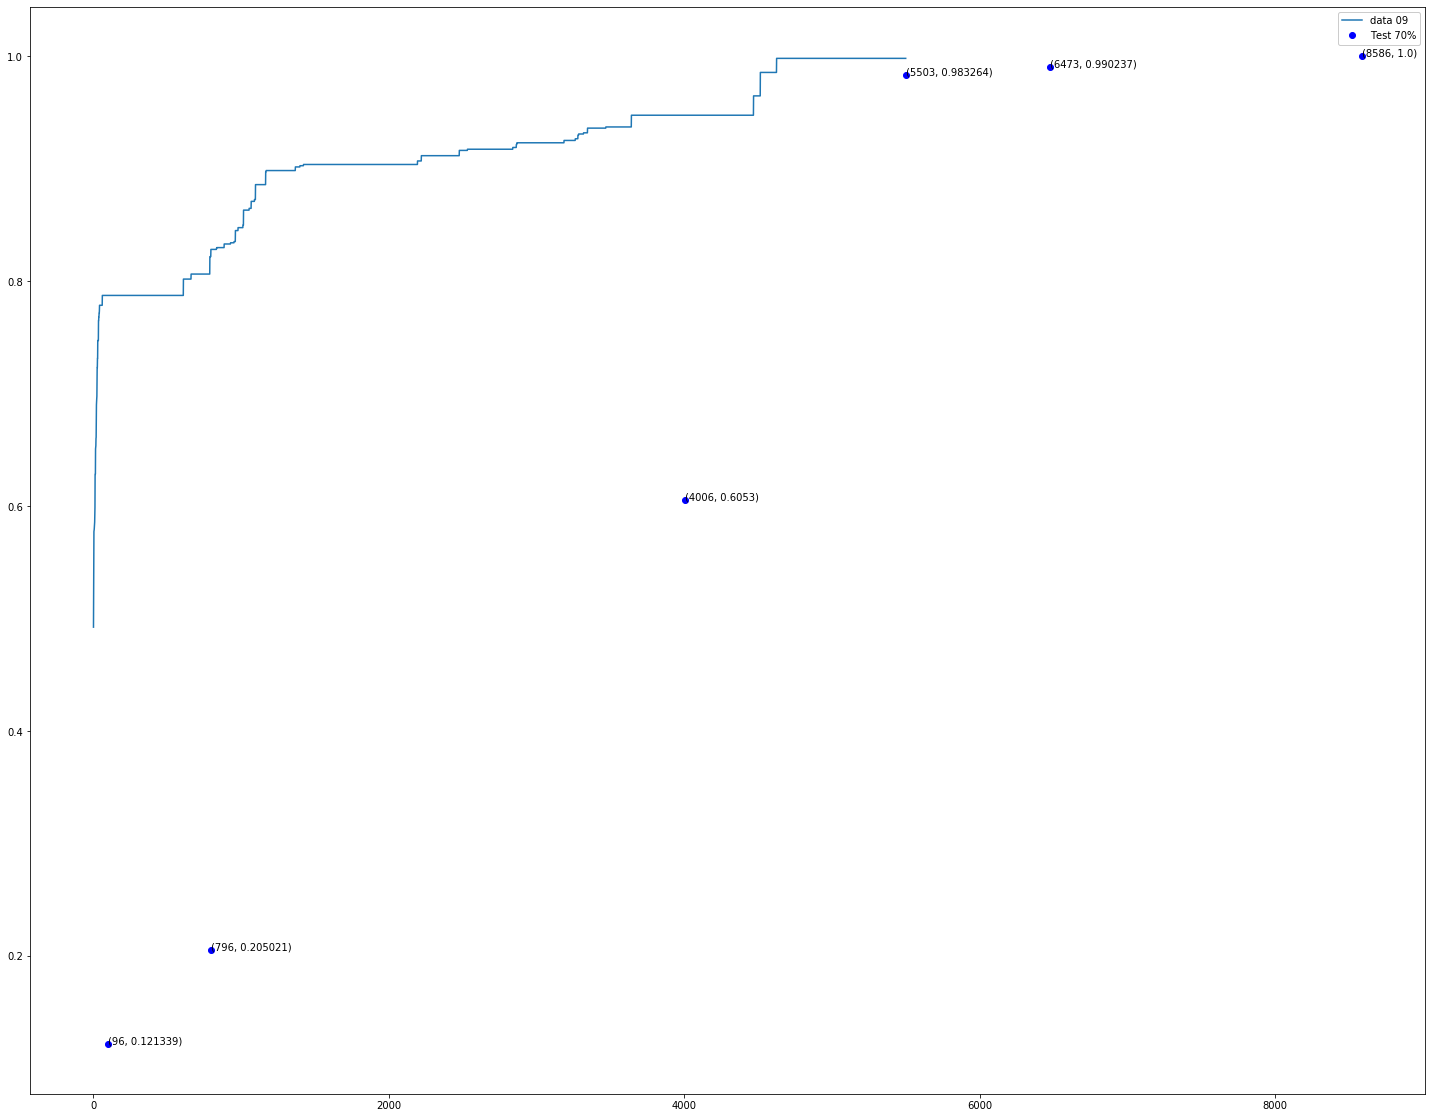

In [169]:
f_d09_30 = pd.read_table('../SubDataSet9-test-train-v05-100/result-param10-6-i2.txt',header=None)

if np.isnan(f_d09_30[-1:][1].values[0]):
    f_d09_30=f_d09_30[:-5]
    

epocas_0, pTrain_0, pHamm_0, df_TP_0, ac_0 = df_Y2Ypredict('../SubDataSet9-test-train/res_test.txt')
epocas_1, pTrain_1, pHamm_1, df_TP_1, ac_1 = df_Y2Ypredict('../SubDataSet9-test-train-v01-79-epoca-150/res_test.txt')
epocas_2, pTrain_2, pHamm_2, df_TP_2, ac_2 = df_Y2Ypredict('../SubDataSet9-test-train-v02-83-epoca-800/res_test.txt')
epocas_3, pTrain_3, pHamm_3, df_TP_3, ac_3 = df_Y2Ypredict('../SubDataSet9-test-train-v03-94-epoca3300/res_test.txt')
epocas_4, pTrain_4, pHamm_4, df_TP_4, ac_4 = df_Y2Ypredict('../SubDataSet9-test-train-v04-95/res_test.txt')
epocas_5, pTrain_5, pHamm_5, df_TP_5, ac_5 = df_Y2Ypredict('../SubDataSet9-test-train-v05-100/res_test.txt')



p_test_epoca = [epocas_0,epocas_1,epocas_2,epocas_3,epocas_4,epocas_5]
p_test_ac = [ac_0,ac_1,ac_2,ac_3,ac_4,ac_5]


plt.plot(f_d09_30[1],label='data 09')
plt.plot(p_test_epoca,p_test_ac,'bo',label='Test 70%')
for i_x, i_y in zip(p_test_epoca, p_test_ac):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.legend(framealpha=1, frameon=True);

epoca: 5503 	pTrain: 0.997915 	pHamm 0.997322 	pTest: 0.983264
[[ 0  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0  9 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 13  0]
 [ 0  0  0 ...  0  0 11]]


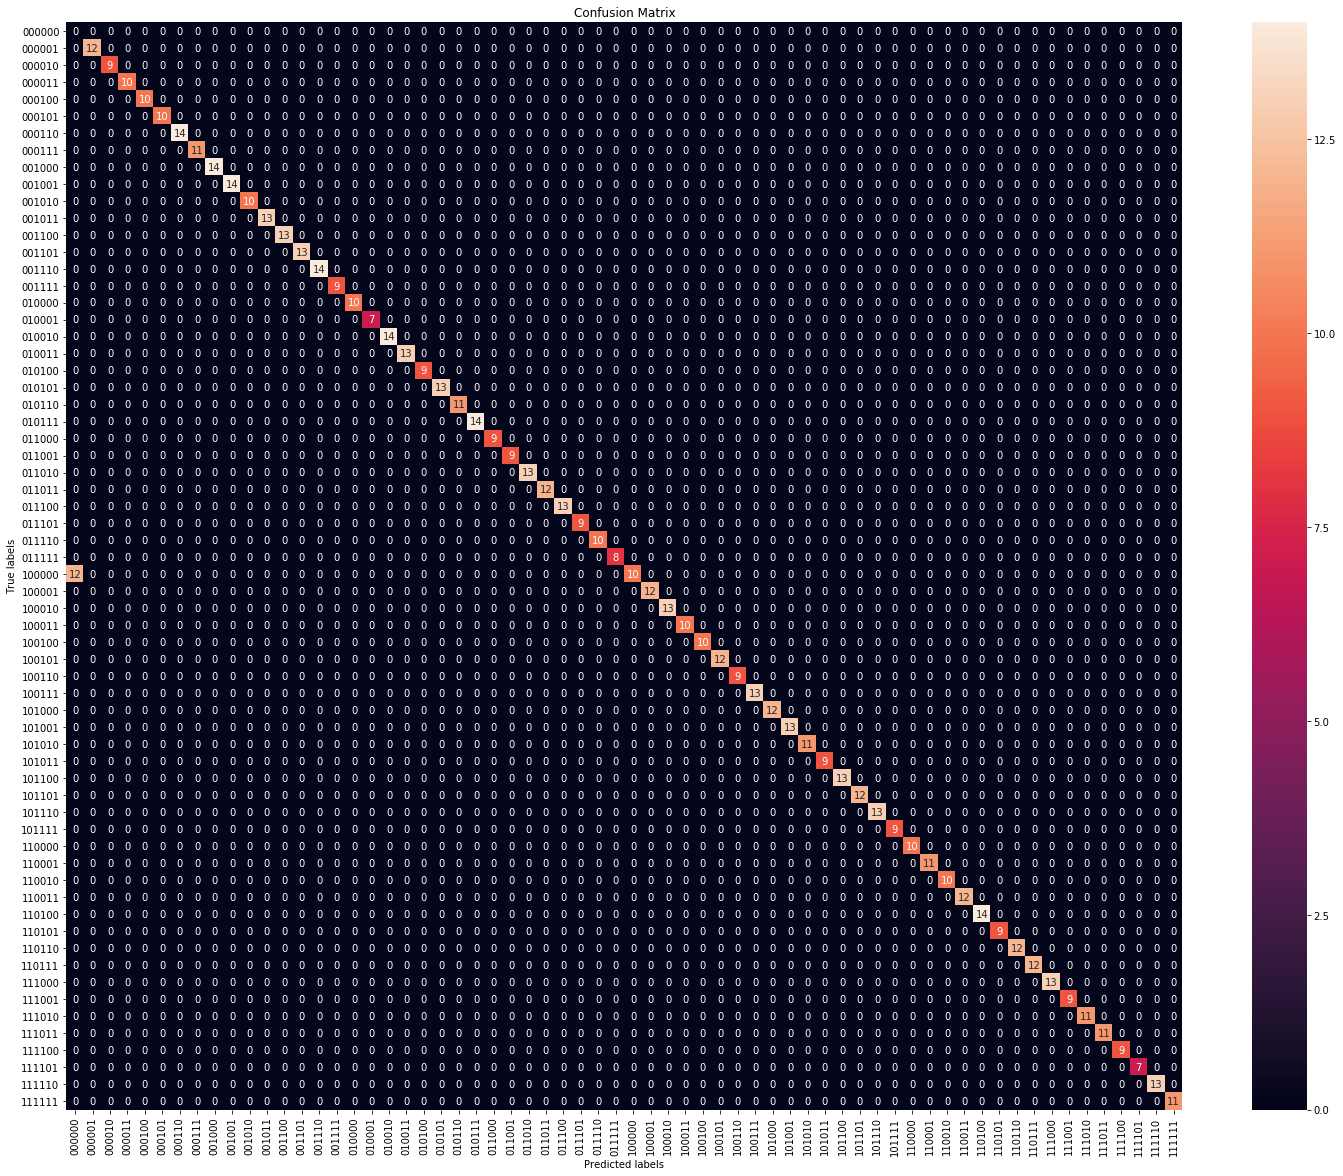

In [170]:
#import seaborn as sns
#import matplotlib.pyplot as plt     

cm = confusion_matrix(df_TP_5['v_output'], df_TP_5['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print("epoca:",epocas_5,"\tpTrain:", pTrain_5,"\tpHamm", pHamm_5,"\tpTest:",ac_5)

print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');

# Data 10

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


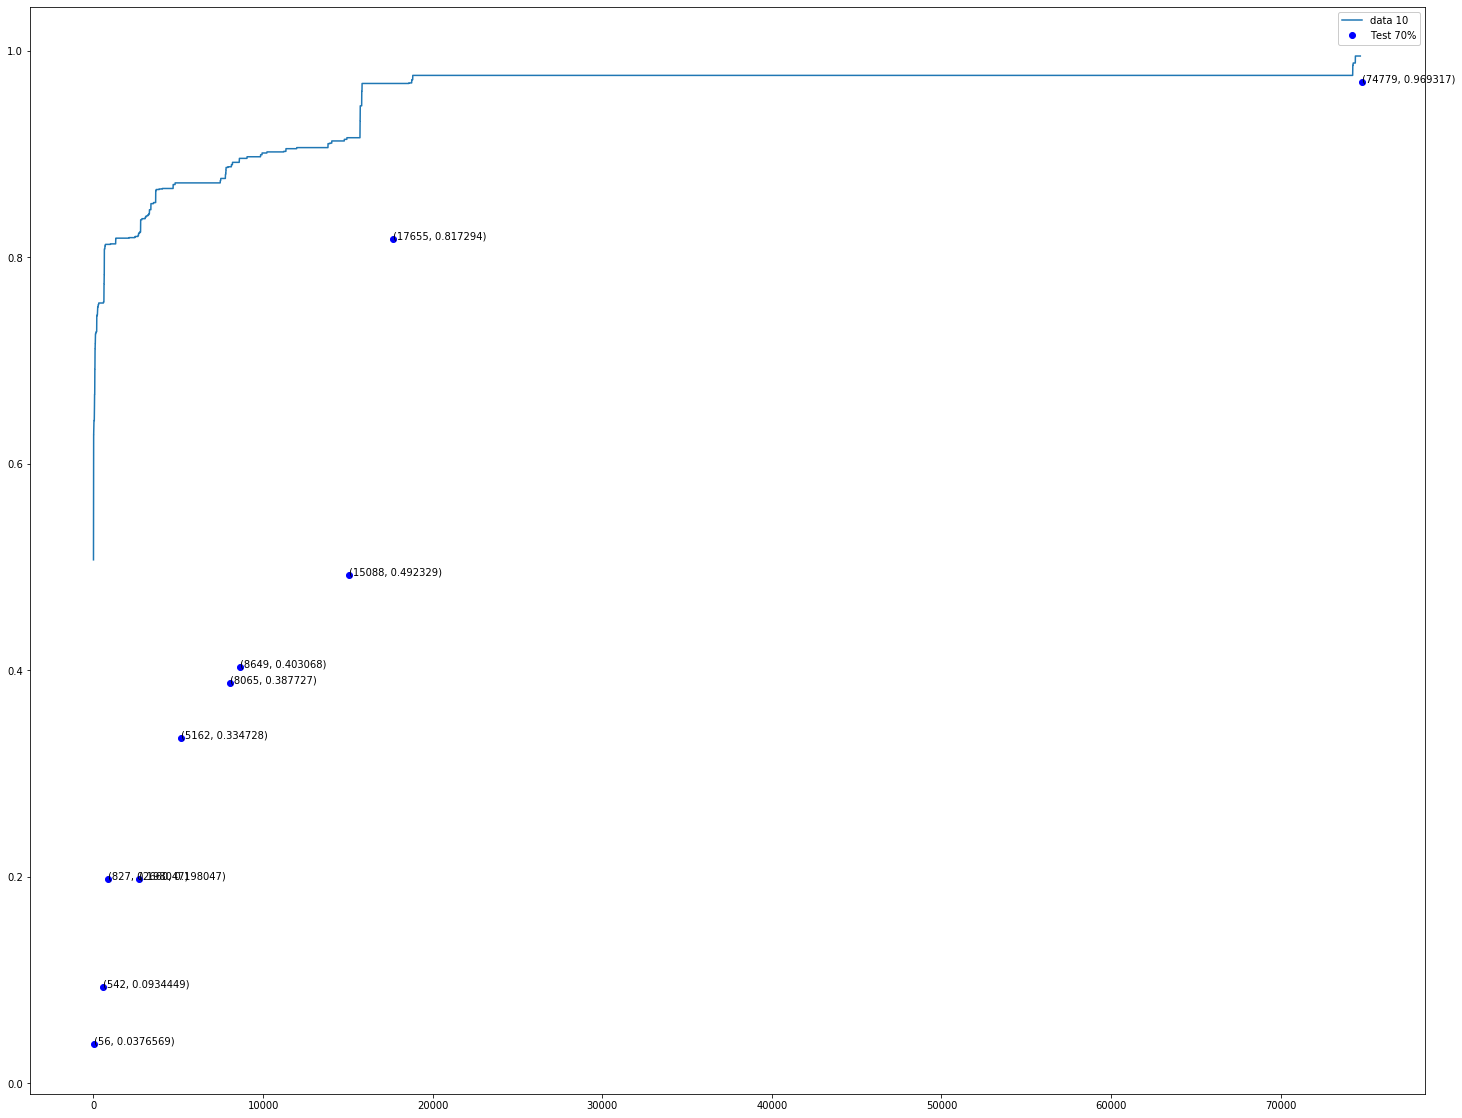

In [173]:
f_d10_30 = pd.read_table('../SubDataSet10-test-train-v09-99-epoca-74780/result-param10-6-i2.txt',header=None)

if np.isnan(f_d10_30[-1:][1].values[0]):
    f_d10_30=f_d10_30[:-5]
    

epocas_0, pTrain_0, pHamm_0, df_TP_0, ac_0 = df_Y2Ypredict('../SubDataSet10-test-train/res_test.txt')
epocas_1, pTrain_1, pHamm_1, df_TP_1, ac_1 = df_Y2Ypredict('../SubDataSet10-test-train-v01-76-epoca-500/res_test.txt')
epocas_2, pTrain_2, pHamm_2, df_TP_2, ac_2 = df_Y2Ypredict('../SubDataSet10-test-train-v02-81-epoca-850/res_test.txt')
epocas_3, pTrain_3, pHamm_3, df_TP_3, ac_3 = df_Y2Ypredict('../SubDataSet10-test-train-v03-82-epoca-2700/res_test.txt')
epocas_4, pTrain_4, pHamm_4, df_TP_4, ac_4 = df_Y2Ypredict('../SubDataSet10-test-train-v04-87-epoca-5100/res_test.txt')
epocas_5, pTrain_5, pHamm_5, df_TP_5, ac_5 = df_Y2Ypredict('../SubDataSet10-test-train-v05-89-epoca-8000/res_test.txt')
epocas_6, pTrain_6, pHamm_6, df_TP_6, ac_6 = df_Y2Ypredict('../SubDataSet10-test-train-v06-90-epoca-8500/res_test.txt')
epocas_7, pTrain_7, pHamm_7, df_TP_7, ac_7 = df_Y2Ypredict('../SubDataSet10-test-train-v07-92-epoca-15120/res_test.txt')
epocas_8, pTrain_8, pHamm_8, df_TP_8, ac_8 = df_Y2Ypredict('../SubDataSet10-test-train-v08-97-epoca-17000/res_test.txt')
epocas_9, pTrain_9, pHamm_9, df_TP_9, ac_9 = df_Y2Ypredict('../SubDataSet10-test-train-v09-99-epoca-74780/res_test.txt')



p_test_epoca = [epocas_0,epocas_1,epocas_2,epocas_3,epocas_4,epocas_5,epocas_6,epocas_7,epocas_8,epocas_9]
p_test_ac = [ac_0,ac_1,ac_2,ac_3,ac_4,ac_5,ac_6,ac_7,ac_8,ac_9]


plt.plot(f_d10_30[1],label='data 10')
plt.plot(p_test_epoca,p_test_ac,'bo',label='Test 70%')
for i_x, i_y in zip(p_test_epoca, p_test_ac):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.legend(framealpha=1, frameon=True);

epoca: 74779 	pTrain: 0.994788 	pHamm 0.994616 	pTest: 0.969317
[[12  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 12]]


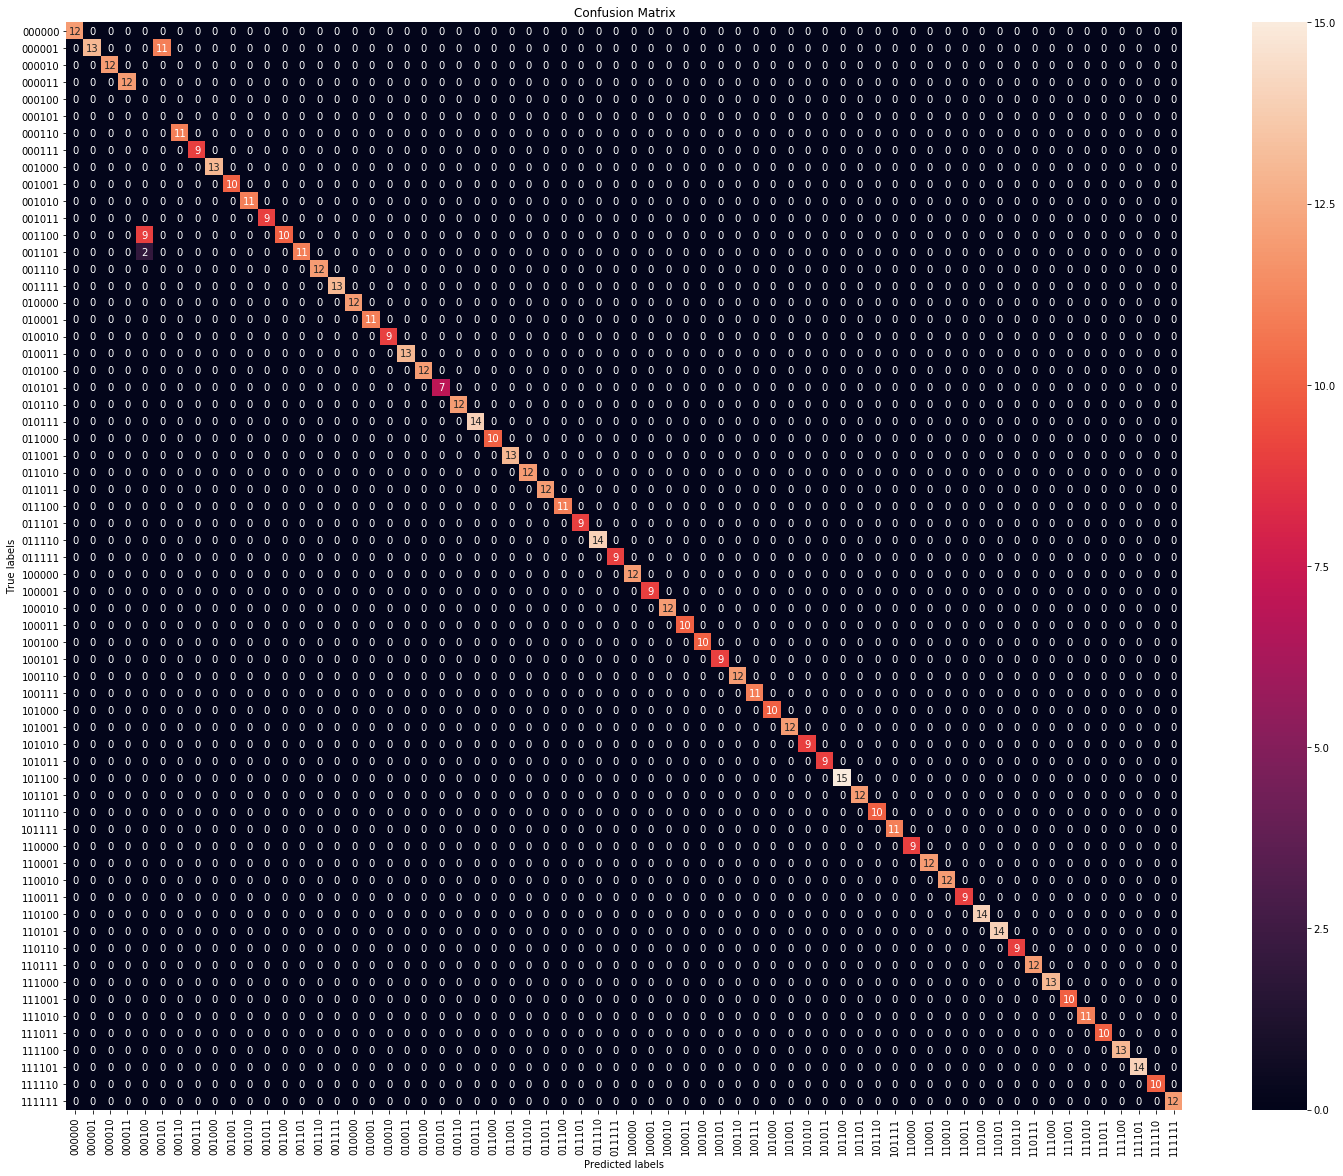

In [174]:
#import seaborn as sns
#import matplotlib.pyplot as plt     

cm = confusion_matrix(df_TP_9['v_output'], df_TP_9['v_predict'])
#cm = confusion_matrix(df_TP['v_output'], df_TP['v_predict'],labels)

print("epoca:",epocas_9,"\tpTrain:", pTrain_9,"\tpHamm", pHamm_9,"\tpTest:",ac_9)

print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation='vertical'); ax.yaxis.set_ticklabels(labels,rotation='horizontal');